# WeatherPy

Analysis
- Average temperature generally increases the closer a location is to the equator
- The variance of temperature ranges appears to increase the further a location is from the equator. Average temperatures for locations within ~5 degrees of the equator only vary by about 20 degrees Fahrenheit, while temperatures around 70 degress latitude vary from about -30 degrees to 35 degress Fahrenheit.
- Their are not strongly discernable trends between latitude and humidity, cloudiness, and windiness. However there may be a loose correlation between increased humidity at higher latitudes and increased windiness further from the equator.

Note: For this analysis I used the OpenWeatherMap APIs 5 day forecast to ensure that temperatures and other data points were averaged out for all times of day. Ideally historical data would be used, but that data is only available at a cost. Using the historical weather data may be a future improvement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
import random
from config import owm_api_key
plt.style.use('seaborn')

# Generate List of Cities

In [2]:
cities = pd.DataFrame({
    "City":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[]
})

city_names = []
country_codes = []
lats = []
lngs = []
duplicate = True

# generate 500 random geo-coordinates, if city is already in list - generate new coordinates
for i in range(0, 500):
    duplicate = True
    while duplicate == True:
        lat = random.uniform(-90, 90)
        lng = random.uniform(-180, 180)
        location = (lat, lng)
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        country_code = city.country_code
        
        dup_found = False
        for existing_city in city_names:
            if city_name == existing_city:
                dup_found = True
            
        if dup_found == False:
            city_names.append(city_name)
            country_codes.append(country_code)
            lats.append(lat)
            lngs.append(lng)
            duplicate = False

# create dataframe from list of cities            
cities["City"] = city_names
cities["Country"] = country_codes
cities["Latitude"] = lats
cities["Longitude"] = lngs
city_count = len(cities["City"])
print(f"Successfully generated a list of {city_count} cities.")
cities.head()

Successfully generated a list of 500 cities.


,City,Country,Latitude,Longitude
0,punta arenas,cl,-75.211011,-89.893037
1,necochea,ar,-40.285380,-57.819281
2,shenjiamen,cn,30.699112,123.988955
3,choix,mx,26.521997,-108.341476
4,mount isa,au,-18.260321,140.264577


# Perform API Calls to OpenWeatherMap

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/forecast"
responses = []
i = 0

for index, row in cities.iterrows():
    i = i+1
    city_name = row["City"]
    country_code = row["Country"]
    params = {
        "q":f"{city_name},{country_code}",
        "appid":owm_api_key,
        "units":"imperial"
    }
    print(f"Retrieving data for city #{i} ({city_name}, {country_code})...")
    print(f"{base_url}?q={city_name},{country_code}&units=imperial&appid=***")
    response = requests.get(base_url, params=params).json()    
    responses.append(response)   

Retrieving data for city #1 (punta arenas, cl)...
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=imperial&appid=***
Retrieving data for city #2 (necochea, ar)...
http://api.openweathermap.org/data/2.5/forecast?q=necochea,ar&units=imperial&appid=***
Retrieving data for city #3 (shenjiamen, cn)...
http://api.openweathermap.org/data/2.5/forecast?q=shenjiamen,cn&units=imperial&appid=***
Retrieving data for city #4 (choix, mx)...
http://api.openweathermap.org/data/2.5/forecast?q=choix,mx&units=imperial&appid=***
Retrieving data for city #5 (mount isa, au)...
http://api.openweathermap.org/data/2.5/forecast?q=mount isa,au&units=imperial&appid=***
Retrieving data for city #6 (coahuayana, mx)...
http://api.openweathermap.org/data/2.5/forecast?q=coahuayana,mx&units=imperial&appid=***
Retrieving data for city #7 (bluff, nz)...
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=imperial&appid=***
Retrieving data for city #8 (rikitea, pf)...
http://api.openwea

Retrieving data for city #63 (dombarovskiy, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=dombarovskiy,ru&units=imperial&appid=***
Retrieving data for city #64 (prainha, br)...
http://api.openweathermap.org/data/2.5/forecast?q=prainha,br&units=imperial&appid=***
Retrieving data for city #65 (yulara, au)...
http://api.openweathermap.org/data/2.5/forecast?q=yulara,au&units=imperial&appid=***
Retrieving data for city #66 (kamenka, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=kamenka,ru&units=imperial&appid=***
Retrieving data for city #67 (puerto ayora, ec)...
http://api.openweathermap.org/data/2.5/forecast?q=puerto ayora,ec&units=imperial&appid=***
Retrieving data for city #68 (nanortalik, gl)...
http://api.openweathermap.org/data/2.5/forecast?q=nanortalik,gl&units=imperial&appid=***
Retrieving data for city #69 (hobart, au)...
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=imperial&appid=***
Retrieving data for city #70 (harper, lr)...
http://ap

Retrieving data for city #124 (illoqqortoormiut, gl)...
http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=imperial&appid=***
Retrieving data for city #125 (ribeira grande, pt)...
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=imperial&appid=***
Retrieving data for city #126 (bandarbeyla, so)...
http://api.openweathermap.org/data/2.5/forecast?q=bandarbeyla,so&units=imperial&appid=***
Retrieving data for city #127 (kidal, ml)...
http://api.openweathermap.org/data/2.5/forecast?q=kidal,ml&units=imperial&appid=***
Retrieving data for city #128 (lagoa, pt)...
http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=imperial&appid=***
Retrieving data for city #129 (carnarvon, au)...
http://api.openweathermap.org/data/2.5/forecast?q=carnarvon,au&units=imperial&appid=***
Retrieving data for city #130 (amderma, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=amderma,ru&units=imperial&appid=***
Retrieving data for city #131 (no

Retrieving data for city #184 (khash, ir)...
http://api.openweathermap.org/data/2.5/forecast?q=khash,ir&units=imperial&appid=***
Retrieving data for city #185 (geraldton, au)...
http://api.openweathermap.org/data/2.5/forecast?q=geraldton,au&units=imperial&appid=***
Retrieving data for city #186 (raga, sd)...
http://api.openweathermap.org/data/2.5/forecast?q=raga,sd&units=imperial&appid=***
Retrieving data for city #187 (naze, jp)...
http://api.openweathermap.org/data/2.5/forecast?q=naze,jp&units=imperial&appid=***
Retrieving data for city #188 (vaitupu, wf)...
http://api.openweathermap.org/data/2.5/forecast?q=vaitupu,wf&units=imperial&appid=***
Retrieving data for city #189 (kenai, us)...
http://api.openweathermap.org/data/2.5/forecast?q=kenai,us&units=imperial&appid=***
Retrieving data for city #190 (cairns, au)...
http://api.openweathermap.org/data/2.5/forecast?q=cairns,au&units=imperial&appid=***
Retrieving data for city #191 (broome, au)...
http://api.openweathermap.org/data/2.5/fo

Retrieving data for city #245 (thompson, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=thompson,ca&units=imperial&appid=***
Retrieving data for city #246 (san ramon, bo)...
http://api.openweathermap.org/data/2.5/forecast?q=san ramon,bo&units=imperial&appid=***
Retrieving data for city #247 (saskatoon, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=saskatoon,ca&units=imperial&appid=***
Retrieving data for city #248 (killarney, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=killarney,ca&units=imperial&appid=***
Retrieving data for city #249 (north platte, us)...
http://api.openweathermap.org/data/2.5/forecast?q=north platte,us&units=imperial&appid=***
Retrieving data for city #250 (pacific grove, us)...
http://api.openweathermap.org/data/2.5/forecast?q=pacific grove,us&units=imperial&appid=***
Retrieving data for city #251 (tabukiniberu, ki)...
http://api.openweathermap.org/data/2.5/forecast?q=tabukiniberu,ki&units=imperial&appid=***
Retrieving data for cit

Retrieving data for city #306 (clarence town, bs)...
http://api.openweathermap.org/data/2.5/forecast?q=clarence town,bs&units=imperial&appid=***
Retrieving data for city #307 (santiago del estero, ar)...
http://api.openweathermap.org/data/2.5/forecast?q=santiago del estero,ar&units=imperial&appid=***
Retrieving data for city #308 (saint-augustin, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=saint-augustin,ca&units=imperial&appid=***
Retrieving data for city #309 (gigmoto, ph)...
http://api.openweathermap.org/data/2.5/forecast?q=gigmoto,ph&units=imperial&appid=***
Retrieving data for city #310 (gimli, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=gimli,ca&units=imperial&appid=***
Retrieving data for city #311 (norman wells, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=imperial&appid=***
Retrieving data for city #312 (tayoltita, mx)...
http://api.openweathermap.org/data/2.5/forecast?q=tayoltita,mx&units=imperial&appid=***
Retrievin

Retrieving data for city #367 (fairbanks, us)...
http://api.openweathermap.org/data/2.5/forecast?q=fairbanks,us&units=imperial&appid=***
Retrieving data for city #368 (chabahar, ir)...
http://api.openweathermap.org/data/2.5/forecast?q=chabahar,ir&units=imperial&appid=***
Retrieving data for city #369 (grajau, br)...
http://api.openweathermap.org/data/2.5/forecast?q=grajau,br&units=imperial&appid=***
Retrieving data for city #370 (bageshwar, in)...
http://api.openweathermap.org/data/2.5/forecast?q=bageshwar,in&units=imperial&appid=***
Retrieving data for city #371 (verkhnyaya toyma, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=verkhnyaya toyma,ru&units=imperial&appid=***
Retrieving data for city #372 (acarau, br)...
http://api.openweathermap.org/data/2.5/forecast?q=acarau,br&units=imperial&appid=***
Retrieving data for city #373 (iwaki, jp)...
http://api.openweathermap.org/data/2.5/forecast?q=iwaki,jp&units=imperial&appid=***
Retrieving data for city #374 (phan thiet, vn)...

Retrieving data for city #428 (gladstone, au)...
http://api.openweathermap.org/data/2.5/forecast?q=gladstone,au&units=imperial&appid=***
Retrieving data for city #429 (dubbo, au)...
http://api.openweathermap.org/data/2.5/forecast?q=dubbo,au&units=imperial&appid=***
Retrieving data for city #430 (coromandel, br)...
http://api.openweathermap.org/data/2.5/forecast?q=coromandel,br&units=imperial&appid=***
Retrieving data for city #431 (paytug, uz)...
http://api.openweathermap.org/data/2.5/forecast?q=paytug,uz&units=imperial&appid=***
Retrieving data for city #432 (yazd, ir)...
http://api.openweathermap.org/data/2.5/forecast?q=yazd,ir&units=imperial&appid=***
Retrieving data for city #433 (kawalu, id)...
http://api.openweathermap.org/data/2.5/forecast?q=kawalu,id&units=imperial&appid=***
Retrieving data for city #434 (svarstad, no)...
http://api.openweathermap.org/data/2.5/forecast?q=svarstad,no&units=imperial&appid=***
Retrieving data for city #435 (avera, pf)...
http://api.openweathermap.

Retrieving data for city #489 (cabrobo, br)...
http://api.openweathermap.org/data/2.5/forecast?q=cabrobo,br&units=imperial&appid=***
Retrieving data for city #490 (millerovo, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=millerovo,ru&units=imperial&appid=***
Retrieving data for city #491 (ambilobe, mg)...
http://api.openweathermap.org/data/2.5/forecast?q=ambilobe,mg&units=imperial&appid=***
Retrieving data for city #492 (port hawkesbury, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=port hawkesbury,ca&units=imperial&appid=***
Retrieving data for city #493 (novikovo, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=novikovo,ru&units=imperial&appid=***
Retrieving data for city #494 (zwedru, lr)...
http://api.openweathermap.org/data/2.5/forecast?q=zwedru,lr&units=imperial&appid=***
Retrieving data for city #495 (mys shmidta, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=imperial&appid=***
Retrieving data for city #496 (salym, r

# Add Results into Dataset

In [4]:
cities["True Latitude"] = ""
cities["True Longitude"] = ""
cities["Temperature (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

avg_temps = []
avg_humidities = []
avg_clouds = []
avg_winds = []
true_lats = []
true_lngs = []
i = 0

for response in responses:
    temps = []
    humidities = []
    winds = []
    clouds = []
    
    # attempt to extract values from api results, report to user if not found
    # average all weather trends in results
    try:
        forecast = response["list"]
        for item in forecast:
            temp = item["main"]["temp"]
            temps.append(temp)
            humidity = item["main"]["humidity"]
            humidities.append(humidity)
            cloudiness = item["clouds"]["all"]
            clouds.append(cloudiness)
            wind = item["wind"]["speed"]
            winds.append(wind)
        avg_temp = np.mean(temps)
        avg_humidity = np.mean(humidities)
        avg_cloudiness = np.mean(clouds)
        avg_wind = np.mean(winds)
        
        location = response["city"]["coord"]
        true_lat = location["lat"]
        true_lng = location["lon"]
        
    except KeyError:
        print(f"Could not retrieve data for {cities.loc[i,'City']}, {cities.loc[i,'Country']}")
        true_lat = None
        true_lng = None
        avg_temp = None
        avg_humidity = None
        avg_cloudiness = None
        avg_wind = None
    
    avg_temps.append(avg_temp)
    avg_humidities.append(avg_humidity)
    avg_clouds.append(avg_cloudiness)
    avg_winds.append(avg_wind)
    true_lats.append(true_lat)
    true_lngs.append(true_lng)
    i = i+1

# insert items into dataframe
cities["True Latitude"] = true_lats
cities["True Longitude"] = true_lngs
cities["Temperature (F)"] = avg_temps
cities["Humidity (%)"] = avg_humidities
cities["Cloudiness (%)"] = avg_clouds
cities["Wind Speed (mph)"] = avg_winds
cities.head()

Could not retrieve data for asau, tv
Could not retrieve data for taolanaro, mg
Could not retrieve data for cockburn harbour, tc
Could not retrieve data for mataura, pf
Could not retrieve data for khonuu, ru
Could not retrieve data for lata, sb
Could not retrieve data for doha, kw
Could not retrieve data for henties bay, na
Could not retrieve data for karla, ee
Could not retrieve data for sataua, ws
Could not retrieve data for sentyabrskiy, ru
Could not retrieve data for garowe, so
Could not retrieve data for karakendzha, tj
Could not retrieve data for mahon, es
Could not retrieve data for ijaki, ki
Could not retrieve data for beni suef, eg
Could not retrieve data for illoqqortoormiut, gl
Could not retrieve data for amderma, ru
Could not retrieve data for kaitangata, nz
Could not retrieve data for angoche, mz
Could not retrieve data for constitucion, mx
Could not retrieve data for tsihombe, mg
Could not retrieve data for raga, sd
Could not retrieve data for vaitupu, wf
Could not retriev

,City,Country,Latitude,Longitude,True Latitude,True Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-75.211011,-89.893037,-53.1501,-70.9167,42.860789,96.394737,46.736842,22.988421
1,necochea,ar,-40.285380,-57.819281,-38.5473,-58.7368,53.777105,78.473684,40.631579,16.692368
2,shenjiamen,cn,30.699112,123.988955,29.9576,122.2980,58.286316,99.605263,71.157895,19.356579
3,choix,mx,26.521997,-108.341476,26.7092,-108.3220,65.269474,45.921053,0.947368,2.212368
4,mount isa,au,-18.260321,140.264577,-20.7334,139.5000,80.162368,32.026316,6.947368,8.427368


# Save Results as CSV

In [5]:
cities.to_csv("weather_data.csv", index=False, header=True)

# Plot Temperature vs. Latitude

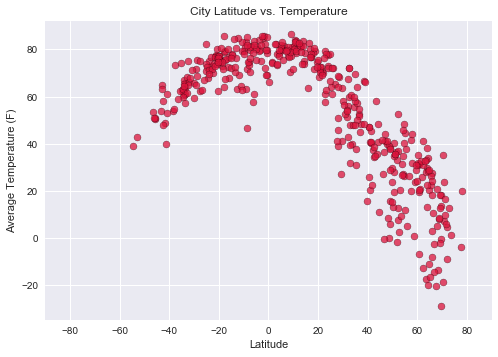

In [6]:
plt.scatter(cities["True Latitude"], cities["Temperature (F)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Temperature")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Average Temperature (F)")
plt.show()

# Plot Humidity vs. Latitude

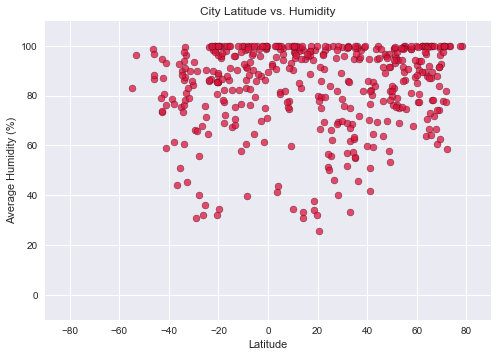

In [7]:
plt.scatter(cities["True Latitude"], cities["Humidity (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Average Humidity (%)")
plt.show()

# Plot Cloudiness vs. Latitude

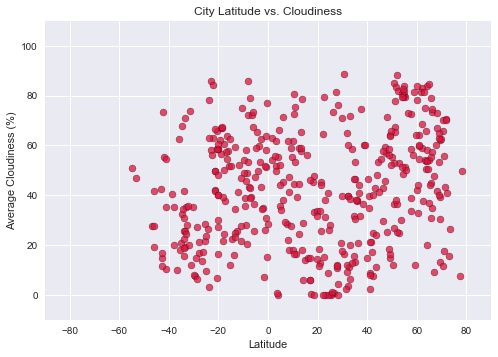

In [8]:
plt.scatter(cities["True Latitude"], cities["Cloudiness (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Average Cloudiness (%)")
plt.show()

# Plot Windiness vs. Latitude

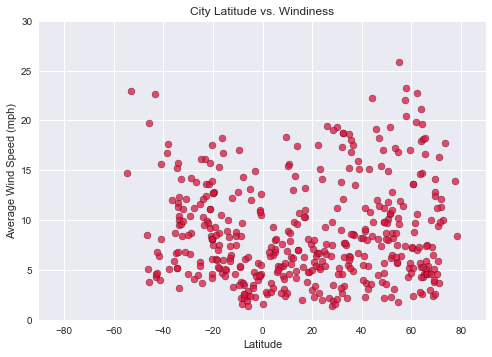

In [10]:
plt.scatter(cities["True Latitude"], cities["Wind Speed (mph)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windiness")
plt.xlim(-90,90)
plt.ylim(0,30)
plt.xlabel("Latitude")
plt.ylabel("Average Wind Speed (mph)")
plt.show()

# Map of Cities

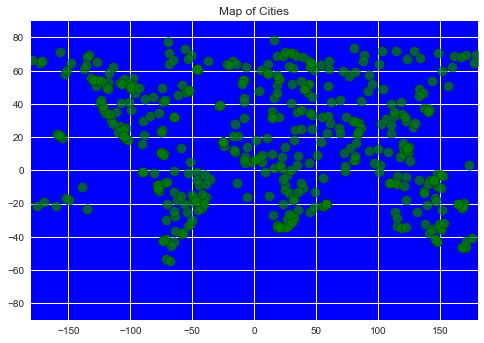

In [14]:
# map of locations
plt.scatter(cities["True Longitude"], cities["True Latitude"], c="green", alpha=0.75, edgecolor="black", s=100)
plt.title("Map of Cities")
plt.rcParams['axes.facecolor'] = 'blue'
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()